# AIML Capstone Project - NLP - 1 - Automatic Ticket Assignment
Status :- Interim Report - Draft for Team Review

# In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

Note : The above link is inaccessible @ Request Shyam's views for the same

Pre-Processing, Data Visualization and EDA
● Exploring the given Data files
● Understanding the structure of data 
● Missing points in data 
● Finding inconsistencies in the data 
● Visualizing different patterns 
● Visualizing different text features 
● Dealing with missing values 
● Text preprocessing 
● Creating word vocabulary from the corpus of report text data 
● Creating tokens as required

# Project Objectives
The objective of the project is,

 Learn how to use different classification models.  Use transfer learning to use pre-built models.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.  Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

# Project submissions and Evaluation Criteria
Submit the project as given below.

 Report with Problem Statement, Related Work, Your Approach and comparison of results with other models written in Latex.

 Github link of where the model is hosted

# Problem Statement
An Incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors through Ticketting systems if available or manually assigning the incidents to the appropriate person or unit for fix and support.

The assignment of incidents to appropriate IT groups through manual processes having many challenges like the effort/cost & time spent on this manual ticketing system is fairly high and the required fix turn around time mostly not within the expected timeline.

All these above said points are due to inappropriate manual processing and allocation of incident Tickets to L3 support teams.

# Related Work

Solution Approach
As per our Review and Analysis on the given problem statment, we would like to provide solution as given below

Pre-Processing Data
### Manipulation or dropping of data in order to ensure enhance performance
### Technics - Data Cleaning / Clencing / Data Integration / Data transformation & reduction

### Ticket classification with machine learning solves this problem. 
### AI tools using 'NLP - Natural language processing' are able to learn, adapt, and determine actions to take, 
### without human input
### So here NLP is being used to understrand Text content and define rules accordingly to solve the problem
### For the given Problem statement, 'Ticket classification (Topic & Sentiment)' is the key to streamline 
### Unstructed data to structed Data
### and setup the right data platform for the right fixes in quick turn around time in orderly manner

# Imports

In [14]:
import pandas as pd
import numpy as np
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


In [15]:
!pip install contractions
import contractions
import unicodedata
!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


In [16]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report


# Reading the data into df

In [219]:
#Reading the excel into data frame
df = pd.read_excel('C:/Users/DELL/Downloads/Data file.xlsx')
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


# To Check unique Assignment Group

In [220]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

Assignment Group Percentage

In [221]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


## Data Visualization
- Plot to visualize the percentage data distribution across different groups
- Benefits - Reconize to rapidly. Visually representation help to identify storgly corelated parameters.
- In this below processing - We identify that overall 46% of ticketing are tagged to "GRP_0"
- Plus the comparison view of GRP_0 Vs other Groups 

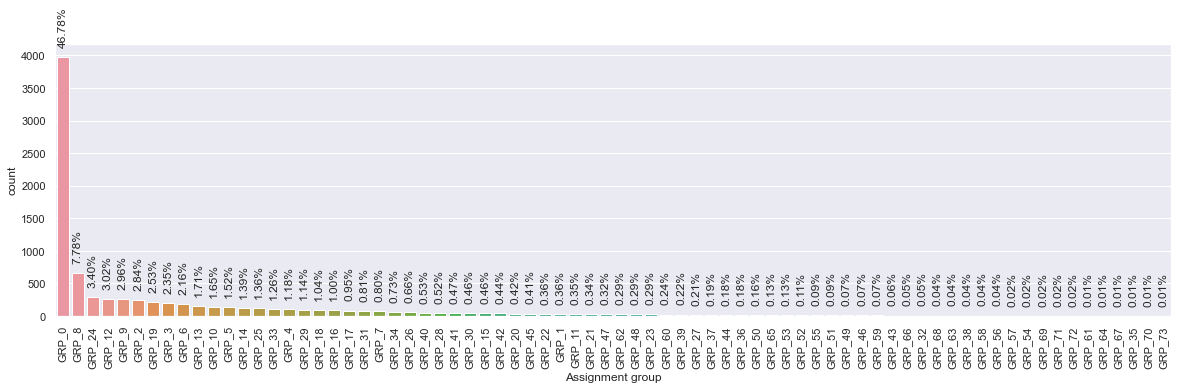

In [254]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 10 groups

In [223]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [224]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


Checking the distirbution

In [256]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


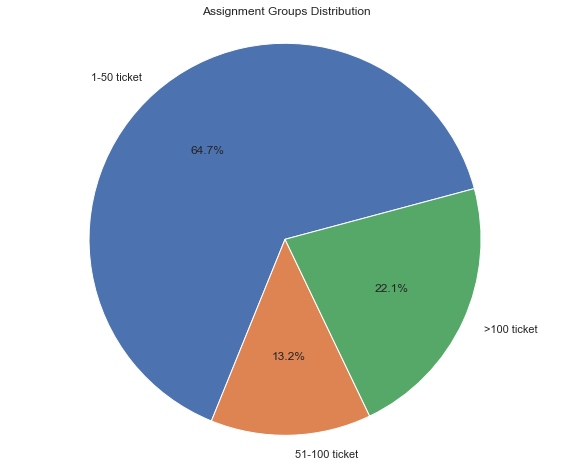

In [257]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [258]:
#checking the null values
df.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
language             0
dtype: int64

### Pre-Processing Data 
- Applying plot to show Percentage of group assignments interms of given ticket buckets mapped to the Group 

## Dealing with missing values

In [259]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group,language


In [260]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [261]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Caller                      viyglzfo ajtfzpkb
Assignment group                        GRP_0
language                                   en
Name: 4395, dtype: object

In [262]:
#Checking for the null values
df.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
language             0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [263]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

## Text preprocessing
- A method to clean text data and make it ready for feed data to the model
- it contains noise and punctuation in various text case
- Here we wanted to count number of words given in dataset
- Groupwise Data count is been displayed in the below cells

In [264]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
685,what type of outage: ___x__network _____c...,GRP_8,152
1628,erp password reset SID_34,GRP_0,4
1438,install office2010 \ ewel8323894 \qidgvtwa qvb...,GRP_24,6
4727,received from: monitoring_tool@company.com_x00...,GRP_9,12
1551,reset the password for xaykwtrf amlswjfr on er...,GRP_0,12
1424,_x000D_\n_x000D_\nreceived from: dshferby.hout...,GRP_0,6
4296,vpn query,GRP_34,2
4117,_x000D_\n_x000D_\nreceived from: nsoikcyf.jhyb...,GRP_0,20
8361,"hello helpdesk, _x000D_\n_x000D_\ncan you help...",GRP_0,20
2426,outlook is not updating.,GRP_0,4


In [265]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1657


In [266]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,GRP_30,1
415,complete,GRP_17,1
416,completed,GRP_0,1
608,funktionsstÃ¶rung,GRP_33,1
618,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,GRP_0,1
...,...,...,...
8059,the,GRP_17,1
8092,the,GRP_17,1
8093,the,GRP_17,1
8168,the,GRP_17,1


In [267]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [268]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
2167,"hello, could you please check why 2 delivery n...",GRP_18,75,350
6489,_x000D_\n_x000D_\nreceived from: nbdljruw.axcr...,GRP_0,46,346
6181,outlook is not opening,GRP_27,4,19
191,user is not able to see all text in mails on h...,GRP_0,13,43
4701,local availability and pricing information mis...,GRP_20,12,87


In [269]:
#Checking the minimum character count
feature_df['char_counts'].min()

1

In [270]:
#Checking the maximum character count
feature_df['char_counts'].max()

12785

In [271]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
3766,\n\nreceived from: umdyvbxo.qwzstijr@gmail.com...,GRP_0,81,504,0.160714
7729,received from: monitoring_tool@company.com_x00...,GRP_8,12,135,0.088889
1790,\n\nreceived from: agjzikpf.nhfrbxek@gmail.com...,GRP_0,138,913,0.151150
8281,"HostName_1238 ( south_amerirtca, br -plm dsc f...",GRP_14,24,142,0.169014
6117,received from: monitoring_tool@company.com_x00...,GRP_8,12,106,0.113208


In [272]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.009900990099009901
Maximum avg word count 1.0


## Text preprocessing
- Stopwords :- In NLP Stopwords are commonly used words in language helps to eliminate unimportant words 
- Allowing application to focus on important word. Stopwords are any word in stop list which are filterout after NLP
- Benefits of eliminating stopwords :- Potentially help improvement of preformance by considering only meaning full data. 
- Data size drecreases which helps model processing performance
- So here we are using 'nltk - Natural Language Tool Kit' libraray to process English text.
- Lemmatization - Is the process of grouping together different inflected forms of words so they can be analyzed as signle items.
- Lemmatization brings context to the word.
- Here we using libraray WordnetLemmatizer for Stop words - Text Pre-Processing

In [273]:
import json
import re
import string
import nltk
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from string import punctuation
#from wordcloud import WordCloud
#from wordcloud import WordCloud, STOPWORDS

In [274]:
print(stop_words)
len(stop_words)

{'whose', '’m', 'sometime', 'under', 'always', 'two', 'even', 'say', 'whatever', 'this', 'being', 'then', 'behind', 'with', 'before', 'any', 'further', 'yours', 'were', 'have', 'until', 'onto', 'namely', 'had', 'again', 'that', 'part', 'together', 'thus', 'wherever', 'beside', 'of', 'four', 'thereafter', 'within', 'enough', 'at', 'anyway', 'everyone', 'here', 'few', 'been', 'wherein', 'an', 'too', 'some', 'much', 'ten', 'she', 'several', 'former', 'get', 'myself', 'sometimes', 'may', 'someone', 'next', 'or', 'therefore', 'toward', 'whither', 're', 'name', 'three', 'nobody', 'whereupon', 'go', 'anyhow', 'than', 'last', 'along', 'somehow', 'fifty', 'into', 'will', 'up', 'to', 'please', 'seeming', 'nowhere', 'hundred', 'amongst', '’d', 'among', 'can', 'i', 'done', 'over', 'seems', 'more', 'are', "n't", 'about', 'various', 'your', "'m", 'almost', 'back', 'call', 'six', 'latter', 'see', 'keep', 'many', 'if', 'anywhere', 'during', 'we', 'one', 'across', 'rather', 'seemed', 'very', 'either', 

326

In [275]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
5904,"the HostName_80 connection lost at 9:05 am , ...",GRP_4,22,97,0.226804,9
1192,intermittent audio issue on computer,GRP_0,5,32,0.156250,1
4249,distributor_tool login issue,GRP_0,3,26,0.115385,0
85,received from: monitoring_tool@company.com_x00...,GRP_6,12,117,0.102564,1
6007,search_serverrfcserver2_x000D_\n search_serve...,GRP_14,4,109,0.036697,0


In [276]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 352


In [277]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
5172,_x000D_\n_x000D_\nreceived from: zenjimdghtybo...,GRP_0,23,229,0.100437,3,0
533,"garthyhtuy was out of office for a long time, ...",GRP_0,27,107,0.252336,16,0
1495,outlook not updating ; crashing intermittently,GRP_0,6,41,0.146341,1,0
7570,windows account locked in ad,GRP_0,5,24,0.208333,1,0
6843,employee id-210667827,GRP_0,2,20,0.100000,0,0


In [278]:
s = feature_df['Digits_count'].groupby(feature_df['Assignment group']).value_counts()

In [279]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 444
Minimum number of digits present 0


In [280]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
6533,_x000D_\n_x000D_\nreceived from: gjtyswkb.dpva...,GRP_6,30,198,0.151515,8,0,0
478,\n\nreceived from: avurmegj.pxgmjynu@gmail.com...,GRP_12,16,105,0.152381,7,0,0
3512,"HostName_986: application ""plm scheduled task...",GRP_14,14,88,0.159091,4,0,0
3797,outlook does not open,GRP_0,4,18,0.222222,2,0,0
651,call came and got disconnected,GRP_0,5,26,0.192308,2,0,0


In [281]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing

In [282]:
df.sample(5)

,Short description,Description,Caller,Assignment group,language
2306,issue with engineering_tooled software,_x000D_\n_x000D_\nreceived from: ntuhoafg.bzwe...,ntuhoafg bzwefjvk,GRP_25,en
8470,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop \nsent: thursday,...",azxhejvq fyemlavd,GRP_16,en
5199,please reset my password for supply_chain_soft...,please reset my password for supply_chain_soft...,ockwafib wftboqry,GRP_0,en
7715,ak - crm in outlook not working,\n\nreceived from: wdpzfqgi.zndgqcux@gmail.com...,wdpzfqgi zndgqcux,GRP_0,en
6613,job SID_30arc1 failed in job_scheduler at: 08/...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_8,en




1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets


In [283]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [284]:
df['language'].value_counts()

en    7002
de     406
af     261
it     149
fr     113
sv      78
da      71
no      69
ca      61
nl      60
es      58
pl      33
pt      29
ro      20
so      13
sl      11
tl      11
sq      10
cy      10
fi       6
hr       6
tr       6
et       5
id       4
sk       3
lt       3
cs       1
lv       1
Name: language, dtype: int64

## Text Pre-Processing
- As part of Text Pre-Processing Analysis we found there are quite few Non English Text.
- So post our reviews we wanted to keep this Non-English data as part of data set for robust model generation.
- So its been agreed to use Translators to convert Non English Text to English and get it processed for Data model feed
- Googletrans & Translator Libraries been used and convered Non English to meaningful English words.
- Below is the Non English Translated Text

In [285]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [286]:
#pip install googletrans

In [287]:
#df['RawDescription'] = df['Short description'].str.cat(df['Description'], sep=' ', na_rep=' ')
df['RawDescription'] = df['Description']
#df.head()

In [288]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['RawDescription'], x['language']), axis=1)

In [289]:
df.sample(5)

,Short description,Description,Caller,Assignment group,language,RawDescription,English_Description
5988,prtgghj4k and SID_67 password reset,unable to login to prtgghj4k and SID_67 systems,qpkbiwzl urypnjvq,GRP_0,en,unable to login to prtgghj4k and SID_67 systems,unable to login to prtgghj4k and SID_67 systems
3866,job Job_2406b failed in job_scheduler at: 09/2...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_8,en,received from: monitoring_tool@company.com_x00...,received from: monitoring_tool@company.com_x00...
2427,job Job_2645 failed in job_scheduler at: 10/04...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_6,en,received from: monitoring_tool@company.com_x00...,received from: monitoring_tool@company.com_x00...
3419,office reinstall,office reinstall,ejvkzobl yijgokrn,GRP_0,en,office reinstall,office reinstall
910,job Job_1378 failed in job_scheduler at: 83.69...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_9,en,received from: monitoring_tool@company.com_x00...,received from: monitoring_tool@company.com_x00...


In [290]:
#df.to_csv('check_translatea.csv', index=False, encoding='utf_8_sig')

In [291]:
df_t = df[(df['English_Description'].str.contains('received from: monitoring_tool@company.com') == True)]

In [292]:
df_t.shape

(961, 7)

In [293]:
df_e = df[(df['English_Description'].str.contains('event') == True)]

In [294]:
df_e.shape

(89, 7)

In [295]:
df_e

,Short description,Description,Caller,Assignment group,language,RawDescription,English_Description
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,en,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...
84,engineering tool drawing originals in pdf form...,"hello it service,_x000D_\ni need to monitor th...",vlymsnej whlqxcst,GRP_11,en,"hello it service,_x000D_\ni need to monitor th...","hello it service,_x000D_\ni need to monitor th..."
341,security incidents - ( #in33071122 ) :[ipbl]: ...,source ip :\nsystem name :lmsl9516338\nuser n...,gzhapcld fdigznbk,GRP_3,en,source ip :\nsystem name :lmsl9516338\nuser n...,source ip :\nsystem name :lmsl9516338\nuser n...
537,us time change,\n\nreceived from: xabkyoug.wdkyiqfx@gmail.com...,xabkyoug wdkyiqfx,GRP_0,en,\n\nreceived from: xabkyoug.wdkyiqfx@gmail.com...,\n\nreceived from: xabkyoug.wdkyiqfx@gmail.com...
874,bex analyzer report not working,i open bex analyzer and connect to SID_37_x000...,wgothrzl iokdftgn,GRP_0,en,i open bex analyzer and connect to SID_37_x000...,i open bex analyzer and connect to SID_37_x000...
...,...,...,...,...,...,...,...
7997,security incidents - ( sw #in33544563 ) : poss...,source ip : 45.25.35.0499\nsystem name : lpal9...,ugyothfz ugrmkdhx,GRP_2,en,source ip : 45.25.35.0499\nsystem name : lpal9...,source ip : 45.25.35.0499\nsystem name : lpal9...
8002,security incidents - ( sw #in33544563 ) : poss...,source ip : 45.25.35.0499_x000D_\nsystem name ...,ugyothfz ugrmkdhx,GRP_62,en,source ip : 45.25.35.0499_x000D_\nsystem name ...,source ip : 45.25.35.0499_x000D_\nsystem name ...
8096,lean event,_x000D_\n_x000D_\nreceived from: ikerxqwz.prky...,ikerxqwz prkyuitl,GRP_0,en,_x000D_\n_x000D_\nreceived from: ikerxqwz.prky...,_x000D_\n_x000D_\nreceived from: ikerxqwz.prky...
8336,hello. please see the highlighted field below...,from: rushethryli h jacfgtykson [mailto:ckflmq...,ckflmqoj fojkrlmw,GRP_29,en,from: rushethryli h jacfgtykson [mailto:ckflmq...,from: rushethryli h jacfgtykson [mailto:ckflmq...


In [296]:
s = df_t['Caller'].groupby(df_t['Assignment group']).value_counts()

In [297]:
s

Assignment group  Caller           
GRP_1             bpctwhsn kzqsbmtp      6
                  ZkBogxib QsEJzdZO      1
GRP_10            bpctwhsn kzqsbmtp     60
                  ZkBogxib QsEJzdZO      2
GRP_12            bpctwhsn kzqsbmtp      8
GRP_13            bpctwhsn kzqsbmtp      4
GRP_14            ZkBogxib QsEJzdZO      2
                  bpctwhsn kzqsbmtp      1
GRP_18            bpctwhsn kzqsbmtp      3
GRP_29            ZkBogxib QsEJzdZO      2
                  bpctwhsn kzqsbmtp      1
GRP_44            bpctwhsn kzqsbmtp      1
GRP_45            bpctwhsn kzqsbmtp      7
GRP_47            ZkBogxib QsEJzdZO      8
                  bpctwhsn kzqsbmtp      2
GRP_5             bpctwhsn kzqsbmtp     96
                  ZkBogxib QsEJzdZO     16
GRP_57            bpctwhsn kzqsbmtp      1
GRP_6             bpctwhsn kzqsbmtp     89
                  ZkBogxib QsEJzdZO     35
GRP_60            bpctwhsn kzqsbmtp     16
GRP_8             bpctwhsn kzqsbmtp    362
                  

In [298]:
df = df[(df['English_Description'].str.contains('received from: monitoring_tool@company.com') == False)]

In [299]:
df = df[(df['English_Description'].str.contains('event') == False)]

In [300]:
#df = df.replace(to_replace = "'", value="")

In [301]:
#dfk = df_bk['English_Description'].replace(to_replace = "'", value="")

In [302]:
#dfk1 = df[df['English_Description'].str.contains("laptop'") == True]

In [303]:
#a_string = df[(df['English_Description'].str.contains("'") == True)]
#stripped_string = a_string.strip("'") 

#print(stripped_string)  #Output: ab"cd

#replaced_string = a_string.replace("'","")  
#print(replaced_string) #Output: abcd
#a_string.sample(5)
#a_string.shape

In [304]:
#a_string.to_csv('string.csv', index=False, encoding='utf_8_sig')

In [305]:
#replaced_string.head

In [306]:
#dfk1 = replaced_string[replaced_string['English_Description'].str.contains("laptop'") == True]

In [307]:
#dfk1

In [308]:
#dfk2 = dfk1.replace(to_replace = "'", value="")
#dfk2

In [309]:
#df = df[(df['English_Description'].str.contains("'") == False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 0 to 8499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7442 non-null   object
 1   Description          7450 non-null   object
 2   Caller               7450 non-null   object
 3   Assignment group     7450 non-null   object
 4   language             7450 non-null   object
 5   RawDescription       7450 non-null   object
 6   English_Description  7450 non-null   object
dtypes: object(7)
memory usage: 465.6+ KB


In [310]:
df['RawWordCount'] = [len(desc.split(' ')) for desc in df['English_Description']]
df.head()
wordCount_before = df['RawWordCount'].sum()

In [311]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  201389


In [312]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset
# TBD : remove Disclaimer

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList



In [313]:
#clean_tickets_df.sample(5)

Droping down the column Description and language after translating

In [314]:
df_translated_text= df.drop(['Description','language'],axis=1)

In [315]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)

In [316]:
#Removing unwanted charcters
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount
6881,user mentioned that the internet gets disconne...,cqlehowf aosqelnr,GRP_0,user mentioned that the internet gets disconne...,user mentioned that the internet gets disconne...,96
7858,dell 7350: pc boot up failure.urgent,qwreamdz pmarxvtk,GRP_3,dell 7350: pc boot up failure.\n-had to try r...,dell 7350 pc boot up failurehad to try restar...,42
305,probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...,wrcktgbd wzrgyunp,GRP_24,probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...,probleme lan an tgeyd1 we_wu113 wrcktgbd wzrgyunp,7
181,unable to connect to vpn,aljbtwsh lepkbgix,GRP_19,unable to connect to vpn,unable to connect to vpn,5
376,business_client not working,lvxakohq tsfnhowj,GRP_0,_x000D_\n_x000D_\nreceived from: lvxakohq.tsfn...,_x000D__x000D_received from lvxakohqtsfnhowjgm...,12


In [317]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [318]:
df_translated_text['Expansions']=df_translated_text['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions
5296,balance carry forward for ap and ar report,ihfkwzjd erbxoyqk,GRP_10,_x000D_\n_x000D_\nreceived from: ihfkwzjd.erbx...,_x000D__x000D_received from ihfkwzjderbxoyqkgm...,30,_x000D__x000D_received from ihfkwzjderbxoyqkgm...
3147,msd: outlook not showing the crm add-in.,ohnimgtv nmqyuolh,GRP_0,msd: outlook not showing the crm add-in._x000D...,msd outlook not showing the crm addin_x000D_co...,32,msd outlook not showing the crm addin_x000D_co...
3001,atp for mm 4870517 issue,qgrbdnoc dgupnhxv,GRP_6,_x000D_\n_x000D_\nreceived from: qgrbdnoc.dgup...,_x000D__x000D_received from qgrbdnocdgupnhxvgm...,83,_x000D__x000D_received from qgrbdnocdgupnhxvgm...
687,outlook not working,dceoufyz saufqkmd,GRP_0,_x000D_\n_x000D_\nreceived from: dceoufyz.sauf...,_x000D__x000D_received from dceoufyzsaufqkmdgm...,10,_x000D__x000D_received from dceoufyzsaufqkmdgm...
2980,hp2çƒ­åŽ‹ç‚‰æ•°æ®ä¼ è¾“å¡ï¼Œæ•°æ®æ›´æ–°ä¸å...,basqoyjx frvwhbse,GRP_30,hp2çƒ­åŽ‹ç‚‰æ•°æ®ä¼ è¾“å¡ï¼Œæ•°æ®æ›´æ–°ä¸å...,hp2çƒåŽçææä¼è¾åï¼Œææææäåºæï¼Œèåæˆè½çåèº,1,hp2çƒåŽçææä¼è¾åï¼Œææææäåºæï¼Œèåæˆè½çåèº


In [319]:
  
df_translated_text['Description_Removed_StopWords']=df_translated_text['Expansions'].apply(lambda t:' '.join([t for t in t.split() if t not in stop_words]))
#Checking for sample rows
df_translated_text.sample(5)


,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords
8402,unable to unlock user accounts in password_man...,hbmwlprq ilfvyodx,GRP_2,password_management_tool problem - look at the...,password_management_tool problem look at the ...,16,password_management_tool problem look at the u...,password_management_tool problem look unlock a...
470,access to s drive.,wnvlmsjr znbvlygd,GRP_12,_x000D_\n_x000D_\nreceived from: wnvlmsjr.znbv...,_x000D__x000D_received from wnvlmsjrznbvlygdgm...,11,_x000D__x000D_received from wnvlmsjrznbvlygdgm...,_x000D__x000D_received wnvlmsjrznbvlygdgmailco...
8023,a supplier told me that i have no warehouse_to...,koiapqbg teyldpkw,GRP_0,"koiapqbg teyldpkw, matheywt kaufsfthyman , pho...",koiapqbg teyldpkw matheywt kaufsfthyman phone...,8,koiapqbg teyldpkw matheywt kaufsfthyman phone ...,koiapqbg teyldpkw matheywt kaufsfthyman phone ...
3773,vip 2 // erp SID_21 account unlock for user vv...,esntuago kwxrdhuv,GRP_0,vip 2 // erp SID_21 account unlock for user vv...,vip 2 erp SID_21 account unlock for user vvsh...,39,vip 2 erp SID_21 account unlock for user vvshy...,vip 2 erp SID_21 account unlock user vvshyuwb1...
5530,when sending emails from w-corp-ebusiness.serv...,gtfdvnry nxsaqrfh,GRP_26,contact # : 803\nsummary: when sending emails ...,contact 803summary when sending emails from ...,37,contact 803summary when sending emails from wc...,contact 803summary sending emails wcorpebusine...


In [320]:
#Removing Multiple spaces
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x: ' '.join(x.split()))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords
7711,mandatory condition mwst is missing for order ...,qnstifeb hybrjfex,GRP_13,could you please check what is wrong with cust...,could you please check what is wrong with cust...,89,could you please check what is wrong with cust...,check wrong customer master 81039969 create de...
4141,password reset to login to collaboration_platf...,vgnpzxbc rbphwimj,GRP_0,password reset to login to collaboration_platf...,password reset to login to collaboration_platf...,9,password reset to login to collaboration_platf...,password reset login collaboration_platform ch...
2855,outlook funktioniert nicht,jnktafrs ytxiowbh,GRP_0,am rechner evhw8114148 funktioniert outlook ni...,am rechner evhw8114148 funktioniert outlook ni...,7,am rechner evhw8114148 funktioniert outlook ni...,rechner evhw8114148 funktioniert outlook nicht...
5539,outlook issue slow,avglmrts vhqmtiua,GRP_0,outlook running slow.,outlook running slow,3,outlook running slow,outlook running slow
2882,skype issues - calling desk and headset // ooo,ifblxjmc dyrgfwbm,GRP_0,my skype errors out when calling my desk phone...,my skype errors out when calling my desk phone...,46,my skype errors out when calling my desk phone...,skype errors calling desk phone calls numbers ...


In [321]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [322]:
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_translated_text.sample(15)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords
1162,network outage: company-russia-ups-vpn-rtr.com...,utyeofsk rdyzpwhi,GRP_8,what type of outage: ___x__network _____c...,what type of outage ___x__network _____ci...,248,what type of outage ___x__network _____circuit...,type outage ___x__network _____circuit _____po...
3373,urgent help required- outlook to crm mfg_toolt...,jhxwiply midhcnze,GRP_40,\n\nreceived from: jhxwiply.midhcnze@gmail.com...,received from jhxwiplymidhcnzegmailcomnot sure...,97,received from jhxwiplymidhcnzegmailcomnot sure...,received jhxwiplymidhcnzegmailcomnot sure erro...
4355,erp system,iksqbuxf muzxgwvk,GRP_0,\n\nreceived from: iksqbuxf.muzxgwvk@gmail.com...,received from iksqbuxfmuzxgwvkgmailcommorningp...,30,received from iksqbuxfmuzxgwvkgmailcommorningp...,received iksqbuxfmuzxgwvkgmailcommorningplease...
7872,unable to login to skype,sbvlxuwm yanbikrx,GRP_0,unable to login to skype,unable to login to skype,5,unable to login to skype,unable login skype
7719,can you please help,smktofel etsoirbw,GRP_55,_x000D_\n_x000D_\nreceived from: smktofel.etso...,_x000D__x000D_received from smktofeletsoirbwgm...,31,_x000D__x000D_received from smktofeletsoirbwgm...,_x000D__x000D_received smktofeletsoirbwgmailco...
8244,now acces to the internet - webside allways ...,blktuiae jzakfmhw,GRP_0,_x000D_\n_x000D_\nreceived from: blktuiae.jzak...,_x000D__x000D_received from blktuiaejzakfmhwgm...,21,_x000D__x000D_received from blktuiaejzakfmhwgm...,_x000D__x000D_received blktuiaejzakfmhwgmailco...
5987,adding members to shared mailbox groups,qcehailo wqynckxg,GRP_0,adding members to the shared mailbox group,adding members to the shared mailbox group,7,adding members to the shared mailbox group,adding members shared mailbox group
2934,probleme mit portal \acqpinyd ecygimqd,acqpinyd ecygimqd,GRP_24,probleme mit portal \acqpinyd ecygimqd,probleme mit portal acqpinyd ecygimqd,5,probleme mit portal acqpinyd ecygimqd,probleme mit portal acqpinyd ecygimqd
6071,erp password locked,gnasmtvx cwxtsvkm,GRP_0,_x000D_\n_x000D_\nreceived from: gnasmtvx.cwxt...,_x000D__x000D_received from gnasmtvxcwxtsvkmgm...,10,_x000D__x000D_received from gnasmtvxcwxtsvkmgm...,_x000D__x000D_received gnasmtvxcwxtsvkmgmailco...
6639,erp SID_34 account locked.,emjalxih bcetgmhr,GRP_0,erp SID_34 account locked.,erp SID_34 account locked,4,erp SID_34 account locked,erp SID_34 account locked


In [323]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    #text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [324]:
df_translated_text['cleaned_description'] = df_translated_text['Description_Removed_StopWords'].apply(lambda x: clean_text(x))

In [325]:
#Remove text with Regex

df_translated_text['cleaned_description_bk'] = df_translated_text['cleaned_description']
# Select columns for cleaning
columnsToClean = ['cleaned_description']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
df_translated_text = cleanDataset(df_translated_text, columnsToClean, getRegexList())

C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\207922563.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return data.str.lower().str.replace(regex.lower(), ' ')


In [326]:
#clean_tickets_df

In [327]:
df_translated_text['number_of_words'] = df_translated_text['cleaned_description'].apply(lambda x: len(x.split()))

In [328]:
df_translated_text.head()

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,Expansions,Description_Removed_StopWords,cleaned_description,cleaned_description_bk,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user detailsemployee manager name_x0...,29,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name d c...,verified user detailsemployee manager name_x00...,23
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,23,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,d d hmjdrvpbkomuaywngmailcom d d team d d me...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,19
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,_x000D__x000D_received from eylqgodmybqkwiamgm...,9,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,d d eylqgodmybqkwiamgmailcom d d d d log vpn...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,11
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,5,unable to access hr_tool page,unable access hr_tool page,unable access tool page,unable access hr_tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,3,skype error,skype error,skype error,skype error,2


In [329]:
#df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

df_text = df_translated_text.drop(['Expansions','Description_Removed_StopWords','cleaned_description_bk'], axis=1)

In [330]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 456
Minimum no of words 0


In [331]:
df_translated_text.shape

(7450, 11)

In [332]:
df_text=df_text[df_text['number_of_words']>0]


In [333]:
df_text.shape

(7354, 8)

In [334]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [335]:
group_Counts

,unique_values,Assignment group
0,GRP_0,3963
1,GRP_24,289
2,GRP_8,244
3,GRP_12,242
4,GRP_2,213
...,...,...
68,GRP_67,1
69,GRP_35,1
70,GRP_61,1
71,GRP_57,1


In [336]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)

In [337]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [338]:
df_text=df_text.replace(list_1,'Others')

In [339]:
len(df_text['Assignment group'].value_counts().unique())

17

# regex pattern 

- Its a Regular Expresession is squential of charcters that specify text search pattern on text. 
- It uses operation on strings of input validation
- Regex helps faster validation
- It allows to create patterns which helps for text manipulation
- Here we are using regex to identify email/URL/filepath/Domain patters which helps to keep the right data for Model feed

In [340]:
email_pattern = r'\S*@\S*\s?'
url_pattern = r'http\S+'
IPaddress_pattern = r'[0-9]+(?:\.[0-9]+){3}'
tab_nl_pattern = r'\s+'
alpha_pattern = r'[a-zA-Z0-9]*_[a-zA-Z0-9]*'
filepath_pattern = r'/[a-zA-Z0-9/]*'
domain_pattern = r'[a-zA-Z0-9]*.[a-zA-Z0-9.]*'
wordsnum_pattern = r'\w*\d\w*'

In [341]:
df_bk = df_text

In [342]:
df_text.shape

(7354, 8)

In [343]:
df_text

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user detailsemployee manager name_x0...,29,verified user detailsemployee manager name d c...,23
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,23,d d hmjdrvpbkomuaywngmailcom d d team d d me...,19
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,_x000D__x000D_received from eylqgodmybqkwiamgm...,9,d d eylqgodmybqkwiamgmailcom d d d d log vpn...,11
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,5,unable access tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,3,skype error,2
...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,_x000D__x000D_received from avglmrtsvhqmtiuagm...,16,d d avglmrtsvhqmtiuagmailcom d d good aftern...,16
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,2,telephony software issue,3
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2 windows password reset for tifpdchb pedxruyf,7,vip windows password reset tifpdchb pedxruyf,6
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,Others,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...,16,unable access macne utilities finish drawers a...,10


In [344]:
df_bk = df_bk.replace(to_replace = email_pattern, value='', regex=True)

In [345]:
df_bk = df_bk.replace(to_replace = '::', value='', regex=True)

In [346]:
df_bk = df_bk.replace(to_replace = "'", value="")

In [347]:
df_bk = df_bk.replace(to_replace = url_pattern, value='', regex=True)

In [348]:
df_bk = df_bk.replace(to_replace = tab_nl_pattern, value=' ', regex=True)

In [349]:
df_bk = df_bk.replace(to_replace = IPaddress_pattern, value='', regex=True)

In [350]:
df_bk['cleaned_description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)


In [351]:
df_bk = df_bk.replace(to_replace = filepath_pattern, value=' ', regex=True)

In [352]:
df_bk = df_bk.replace(to_replace = 'received from:', value='', regex=True)

In [353]:
df_bk['cleaned_description'].replace(to_replace = wordsnum_pattern, value=' ', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)

In [354]:
#df_t = df_bk[(df_bk['cleaned_description'].str.contains('job_scheduler') == False)]
#df_t = df_bk[(df_bk['cleaned_description'].str.contains('received from: monitoring_tool@company.com') == False)]

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 0 to 8499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7442 non-null   object
 1   Description          7450 non-null   object
 2   Caller               7450 non-null   object
 3   Assignment group     7450 non-null   object
 4   language             7450 non-null   object
 5   RawDescription       7450 non-null   object
 6   English_Description  7450 non-null   object
 7   RawWordCount         7450 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 523.8+ KB


In [356]:
df_bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7354 entries, 0 to 8499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7346 non-null   object
 1   Caller               7354 non-null   object
 2   Assignment group     7354 non-null   object
 3   RawDescription       7354 non-null   object
 4   English_Description  7354 non-null   object
 5   RawWordCount         7354 non-null   int64 
 6   cleaned_description  7354 non-null   object
 7   number_of_words      7354 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 517.1+ KB


In [357]:
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            jloygrwh acvztedi       4
                 spxqmiry zpwgoqju       3
                 jyoqwxhz clhxsoqy       2
                 kbnfxpsy gehxzayq       2
                 rkupnshb gsmzfojw       2
GRP_10           ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3
                 ikerxqwz prkyuitl       3

In [358]:
#df_bk.to_csv('translated_ticketfins.csv', index=False, encoding='utf_8_sig')

cleaned description senteces to words

In [359]:
combined_text=df_bk.cleaned_description.values.tolist()

In [360]:
combined_text[1]

' d d hmjdrvpbkomuaywngmailcom d d team d d meetingsskype meetings etc appearing outlook calendar somebody advise correct d d '

In [361]:
#pip install gensim

In [362]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [363]:
dat = pd.DataFrame({'col':data_words})

In [364]:
dat.sample(5)

,col
1841,"[having, issues, opening, outlook, skype, busi..."
692,"[team, usa, read, write, access, following, fo..."
6633,"[engineering, tool, work]"
1175,"[jpg, kryuisti, turleythyusa, site, business]"
1400,"[unable, login, skype]"


Bigram Trigam data working

In [365]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [366]:
print(bigram_mod[data_words[1]])

['team', 'meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [367]:
print(trigram_mod[bigram_mod[data_words[1]]])

['team', 'meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [368]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [369]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [370]:
print(data_words_bigrams[1])

['team', 'meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [371]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [372]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

#Word cloud

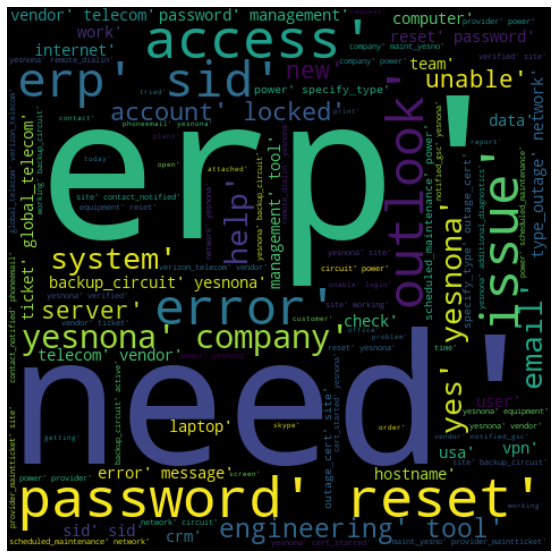

In [373]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [374]:
new_df = df_bk.copy()
new_df['words'] = data_words_bigrams
new_df

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words,words
0,login issue,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user detailsemployee manager name_x00...,29,verified user detailsemployee manager name d c...,23,"[verified, user, detailsemployee_manager, name..."
1,outlook,hmjdrvpb komuaywn,GRP_0,"_x000D_ _x000D_ _x000D_ hello team,_x000D_ _x...",_x000D__x000D_received from hmjdrvpbkomuaywngm...,23,d d hmjdrvpbkomuaywngmailcom d d team d d mee...,19,"[team, meetingsskype, meetings, etc, appearing..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D_ _x000D_ _x000D_ hi_x000D_ _x000D_ i c...,_x000D__x000D_received from eylqgodmybqkwiamgm...,9,d d eylqgodmybqkwiamgmailcom d d d d log vpn ...,11,"[log, vpn]"
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,5,unable access tool page,4,"[unable, access, tool, page]"
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,3,skype error,2,"[skype, error]"
...,...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,"_x000D_ _x000D_ _x000D_ good afternoon,_x000D...",_x000D__x000D_received from avglmrtsvhqmtiuagm...,16,d d avglmrtsvhqmtiuagmailcom d d good afterno...,16,"[good_afternoon, receiving, emails, sent, mail..."
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,2,telephony software issue,3,"[telephony_software, issue]"
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2 windows password reset for tifpdchb pedxruyf,7,vip windows password reset tifpdchb pedxruyf,6,"[vip, windows, password, reset, tifpdchb, pedx..."
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,Others,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...,16,unable access macne utilities finish drawers a...,10,"[unable, access, macne, utilities, finish, dra..."


In [375]:
new_df['word_count']=new_df['cleaned_description'].apply(lambda x:len(str(x).split()))
new_df['char_counts']=new_df['cleaned_description'].apply(lambda x: char_counts(str(x)))
new_df['Digits_count']=new_df['cleaned_description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
new_df['Avg_word_Count']=new_df['word_count']/new_df['char_counts']

In [376]:
new_df.sample(100)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count
3752,"my phone #, erp, ""name or password is incorrec...",wvaksnpy vnixhytj,GRP_0,i have access to a few systems on erp but i am...,i have access to a few systems on erp but i am...,85,access systems erp able log system entered wyn...,43,"[access, systems, erp, able, log, system, ente...",43,283,0,0.151943
8378,ecc qa - peer certificate rejected by chainver...,tskwevno sjhpoakl,GRP_14,just found out that the eccqa certificate is n...,just found out that the eccqa certificate is n...,189,found eccqa certificate valid error got talkin...,138,"[found, eccqa, certificate, valid, error, got,...",138,1076,0,0.128253
446,setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...,puxsvfwr cwkjruni,GRP_24,setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...,setup rechner ewel8323865 fÃ¼r hrthrydad thryd...,10,setup rechner ewel r hrthrydad thrydad consult...,9,"[setup, rechner, ewel, hrthrydad, thrydad, con...",9,59,0,0.152542
5451,setup rechnerf fÃ¼r infostand instandsetzung \...,niptbwdq csenjruz,GRP_24,setup rechnerf fÃ¼r infostand instandsetzung \...,setup rechnerf fÃ¼r infostand instandsetzung n...,7,setup rechnerf r infostand instandsetzung nipt...,7,"[setup, rechnerf, infostand, instandsetzung, n...",7,53,0,0.132075
1619,vip zip file,jwhmqnye xlpvdwre,GRP_12,i have a large zip file that i want to downl...,received from jwhmqnyexlpvdwregmailcomi have a...,46,jwhmqnyexlpvdwregmailcomi large zip file want...,21,"[large, zip, file, want, download, add, folder...",21,203,0,0.103448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,unable to log in to supply_chain_software,fnqelwpk ahrskvln,GRP_0,unable to log in to supply_chain_software,unable to log in to supply_chain_software,6,unable log supply chain software,5,"[unable, log, supply_chain, software]",5,28,0,0.178571
5755,system not responding,qftpazns fxpnytmk,GRP_0,system not responding,system not responding,3,system responding,2,"[system, responding]",2,16,0,0.125000
4913,skype audio not working,eqxakzyi cwfrjitq,GRP_0,skype audio not working._x000D_ -connected to ...,skype audio not working_x000D_connected to the...,25,skype audio working d connected user system te...,25,"[skype, audio, working, connected, user, syste...",25,130,0,0.192308
494,logon balancing error on erp SID_34,xtqbjieu uablitwr,GRP_2,logon balancing error on erp SID_34 user brand...,logon balancing error on erp SID_34user brandt...,13,logon balancing error erp sid user brandtrhee ...,11,"[logon_balancing, error, erp, sid, user, brand...",11,65,0,0.169231


In [377]:

# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
new_df['token_desc'] = new_df['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [378]:
new_df['token_desc'].head()

0    [verified, user, detailsemployee, manager, nam...
1    [d, d, hmjdrvpbkomuaywngmailcom, d, d, team, d...
2    [d, d, eylqgodmybqkwiamgmailcom, d, d, d, d, l...
3                         [unable, access, tool, page]
4                                       [skype, error]
Name: token_desc, dtype: object

In [379]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

new_df['token_desc'] = new_df['token_desc'].apply(lambda x : combine_text(x))

In [380]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(new_df['token_desc'])

In [381]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

C:\Users\DELL\anaconda6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [382]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
password,3.099630
erp,3.143880
unable,3.279070
reset,3.304627
tool,3.328060
sid,3.452665
issue,3.466985
account,3.499561
user,3.526409
error,3.561014


In [383]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
inwarehouse tool,5.744253
space,5.744253
center,5.626470
sid sid,5.612676
folder,5.612676
circuit yes,5.521109
login issue,5.521109
ist,5.521109
mobile,5.508686
microsoft,5.496416


In [384]:
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.190743,0.249143,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.608671,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.721195,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:
df_inc['Assignment_group']= new_df['Assignment group']
df_inc['token_desc']= new_df['token_desc']

In [386]:
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,Assignment_group,token_desc
0,0.190743,0.249143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,verified user detailsemployee manager name d c...
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,d d hmjdrvpbkomuaywngmailcom d d team d d meet...
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,d d eylqgodmybqkwiamgmailcom d d d d log vpn d d
3,0.000000,0.000000,0.608671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,unable access tool page
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0,skype error


In [387]:
df_inc_sample = df_inc[df_inc['Assignment_group'].map(df_inc['Assignment_group'].value_counts()) > 100]

In [388]:
df_inc_sample = new_df[new_df['Assignment group'].map(new_df['Assignment group'].value_counts()) > 100]

In [389]:
df_inc_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 8499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Short description    6882 non-null   object 
 1   Caller               6890 non-null   object 
 2   Assignment group     6890 non-null   object 
 3   RawDescription       6890 non-null   object 
 4   English_Description  6890 non-null   object 
 5   RawWordCount         6890 non-null   int64  
 6   cleaned_description  6890 non-null   object 
 7   number_of_words      6890 non-null   int64  
 8   words                6890 non-null   object 
 9   word_count           6890 non-null   int64  
 10  char_counts          6890 non-null   int64  
 11  Digits_count         6890 non-null   int64  
 12  Avg_word_Count       6890 non-null   float64
 13  token_desc           6890 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 807.4+ KB


In [390]:
X = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

In [391]:
#X.to_csv('X.csv', index=False, encoding='utf_8_sig')

In [392]:
df_inc_sample.shape

(6890, 14)

In [393]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [394]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

In [395]:
vectorizer = CountVectorizer(ngram_range = (1,2), stop_words=stopwords.words('english'), 
                             min_df = 0.05, max_df = 0.8, max_features = 100)

In [396]:
vectorizer

CountVectorizer(max_df=0.8, max_features=100, min_df=0.05, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [397]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

<5167x20 sparse matrix of type '<class 'numpy.int64'>'
	with 8175 stored elements in Compressed Sparse Row format>

In [398]:
X_test

66      dn d plantplant plant d the issue display d ek...
8094    jusfrttin gtehdnyuerrf mailtosystemhr toolcom ...
1183    namefyzceglp vfnraqxclanguagebrowsermicrosoft ...
7402        upgrade telephony software dierppeared screen
6527                                             response
                              ...                        
3495    d d ztdgvclpgzcalstqgmailcom d d d having prob...
7684                unable view credit card statement ess
4578    zeiterfassung funktioniert nicht qs qualit tsm...
2492    complete required questions d returned gsc req...
3601    given surname changes required windows domain ...
Name: token_desc, Length: 1723, dtype: object

In [399]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names()[:10]

C:\Users\DELL\anaconda6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'access',
 'account',
 'company',
 'erp',
 'error',
 'help',
 'issue',
 'login',
 'need']

In [400]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr = OneVsRestClassifier(lr)

ovr.fit(X_train_dtm, y_train)
y_pred_ovr_test = ovr.predict(X_test_dtm)
y_pred_ovr_test

array([0, 0, 0, ..., 0, 0, 0])

In [401]:
ovr.fit(X_train_dtm, y_train)
pred = ovr.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
linear_acc=accuracy_score(y_test,pred)

0.5943122460824144


In [402]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       985
           1       0.00      0.00      0.00        62
           2       1.00      0.04      0.07        27
           3       0.50      0.03      0.06        29
           4       0.14      0.02      0.03        59
           5       0.81      0.21      0.34        61
           6       0.00      0.00      0.00        73
           7       0.33      0.04      0.07        26
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        27
          10       0.86      0.51      0.64        59
          11       0.39      0.03      0.05       256

    accuracy                           0.59      1723
   macro avg       0.39      0.16      0.17      1723
weighted avg       0.49      0.59      0.47      1723



C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


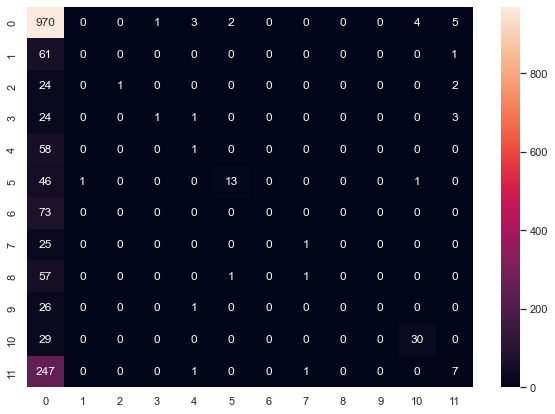

In [403]:
conf_mat = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [404]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train_dtm, y_train)
pred = lsvc.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
SVC_acc=accuracy_score(y_test,pred)
conf_mat = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))

0.5943122460824144
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       985
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        29
           4       0.25      0.02      0.03        59
           5       0.76      0.21      0.33        61
           6       0.00      0.00      0.00        73
           7       0.33      0.04      0.07        26
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        27
          10       0.86      0.51      0.64        59
          11       0.38      0.02      0.04       256

    accuracy                           0.59      1723
   macro avg       0.26      0.15      0.15      1723
weighted avg       0.46      0.59      0.46      1723



C:\Users\DELL\anaconda6\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

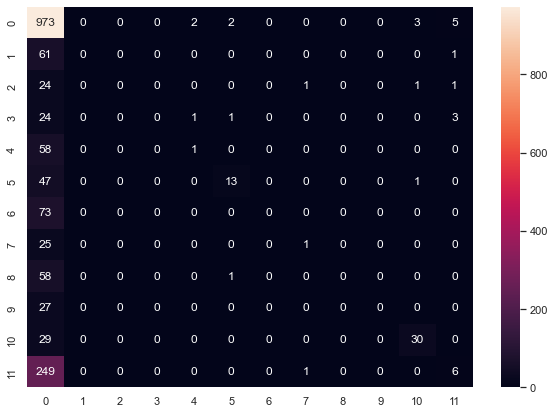

In [405]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [406]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(X_train_dtm, y_train)
pred_RF = rfcl.predict(X_test_dtm)
acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)

0.5850261172373766


Bernoullis Classifier¶

In [407]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
pred = clf.predict(X_test_dtm)
print(accuracy_score(y_test, pred))
ber_acc=accuracy_score(y_test,pred)
print(pred)

0.5821242019733024
[0 0 0 ... 0 5 0]


In [408]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73       985
           1       0.00      0.00      0.00        62
           2       0.20      0.04      0.06        27
           3       0.33      0.03      0.06        29
           4       0.33      0.02      0.03        59
           5       0.38      0.23      0.29        61
           6       0.00      0.00      0.00        73
           7       0.17      0.04      0.06        26
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        27
          10       0.97      0.51      0.67        59
          11       0.27      0.05      0.09       256

    accuracy                           0.58      1723
   macro avg       0.27      0.16      0.17      1723
weighted avg       0.45      0.58      0.47      1723



C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda6\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


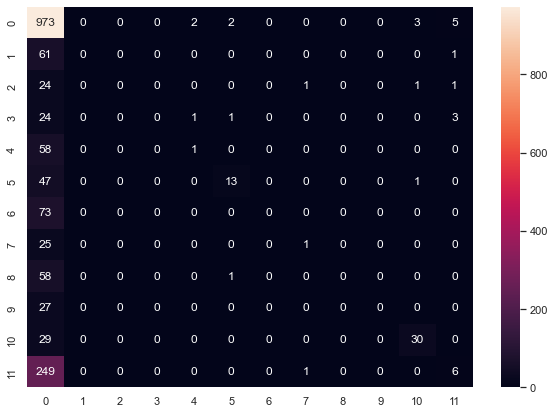

In [409]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [410]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression', 'Linear SVC', 'RandomForest', 
                                                    'Bernoullis Classifier'],'Accuracy (%)':
                                              [linear_acc*100,SVC_acc*100,acc_RF*100,ber_acc*100]})

print("Following table shows comparison of the classification algorithms: ")
df_comp

Following table shows comparison of the classification algorithms: 


,Classification Algorithm,Accuracy (%)
0,Logistic Regression,59.431225
1,Linear SVC,59.431225
2,RandomForest,58.502612
3,Bernoullis Classifier,58.212420


In [412]:
df_new = pd.read_excel('C:/Users/DELL/Downloads/Data file.xlsx')

In [413]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [414]:
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe


In [415]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

df_text['Assignment group'],grp_mapping_all_raw = labelencoder(df_text['Assignment group'])

In [416]:
df_text.sample(10)

,Short description,Caller,Assignment group,RawDescription,English_Description,RawWordCount,cleaned_description,number_of_words
1395,unable to connect to vpn,ijplstng juybetlo,0,unable to connect to vpn,unable to connect to vpn,5,unable connect vpn,3
8444,unable to login the impact award login screen.,qxpytolu smagdipr,0,i am unable to login the url:,i am unable to login the url,8,unable login url,3
259,unable to login to hr_tool,imoelsap gxdwkimv,0,unable to login to hr_tool \n\n,unable to login to hr_tool,6,unable login tool,3
1468,ticket update on inplant_869308,fumkcsji sarmtlhy,0,ticket update on inplant_869308,ticket update on inplant_869308,4,ticket update inplant,3
8211,single/sign on for hr_tool oneteam is not work...,jegpvyrh kasnhdrb,0,_x000D_\n_x000D_\nreceived from: jegpvyrh.kasn...,_x000D__x000D_received from jegpvyrhkasnhdrbgm...,13,d d jegpvyrhkasnhdrbgmailcom d d singlesign ...,22
6307,i have created 2 new material numbers but when...,xplwmiyr pifoldxr,12,mm#'s 7390081 and 6290061,mms 7390081 and 6290061,4,mms,1
4694,lhbsm005: disk free on f:\ is now 3 % which is...,rkupnshb gsmzfojw,2,lhbsm005: disk free on f:\ is now 3 % which is...,lhbsm005 disk free on f is now 3 which is bel...,17,lhbsm disk free warning threshold,5
1996,erp SID_34 account,zuxcfonv nyhpkrbe,0,\n\nreceived from: zuxcfonv.nyhpkrbe@gmail.com...,received from zuxcfonvnyhpkrbegmailcomgsopleas...,16,zuxcfonvnyhpkrbegmailcomgso unlock reset pass...,10
5728,vpn link,neoarmgd meodvbxu,0,_x000D_\n_x000D_\nreceived from: neoarmgd.meod...,_x000D__x000D_received from neoarmgdmeodvbxugm...,26,d d neoarmgdmeodvbxugmailcom d d d d able lo...,24
3159,user unable to login to the telephony_software .,unzfykar osxmbhav,17,user unable to login to the telephony_software...,user unable to login to the telephony_software...,19,user unable login telephony software user unab...,13


# Word2Vec embedding

In [ ]:
#project_path = '/C:/Users/91906/'

In [ ]:
sentences = [line.split(' ') for line in df_text['cleaned_description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('word2vec_vector.txt')

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [417]:
maxlen = 300
numWords=9000
epochs = 10

In [418]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

# LSTM Model

In [419]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train,_, y_train,_, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_text,100,epochs)
rawData_accuracy = lstmModelRawData.prediction()

Number of Samples: 7354
Number of Labels:  7354
Number of train Samples: 5883
Number of val Samples: 1471
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               25700     
                                                                 
 dense_11 (Dense)  

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

# Ends Here